In [1]:
from pymatgen.ext.matproj import MPRester
from matplotlib import pyplot as plt 
from tabulate import tabulate
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np

In [2]:
mp_key = "u9ZAHMoFazUCz7neZTBfXBwCZ5RESH4Z"
mp_id = "mp-567636"

In [3]:
#strucure de l'atome et des bandes éléctroniques 
structure = MPRester(mp_key).get_structure_by_material_id(mp_id)
el_bs = MPRester(mp_key).get_bandstructure_by_material_id(mp_id)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Bande interdite 

In [4]:
#analyse de la bande interdite 
bandgap = el_bs.get_band_gap()
print(bandgap)
print("Énergie de la bande interdite : ",str(bandgap.get('energy'))+" eV")

{'direct': False, 'energy': 0.3487, 'transition': 'L-X'}
Énergie de la bande interdite :  0.3487 eV


Comme la bande interdite a une énergie faible, on peut dire du crystal qu'il s'agit d'un semi conducteur. 

# Dernière bande de valence  

In [5]:
#analyse de la dernière bande de valence 
vbm = el_bs.get_vbm() #Valence Band Maximum
plot = BSPlotter(el_bs)
data = plot.bs_plot_data()
zero_energy = data.get('zero_energy')
print(tabulate([["Bande(s) contenant le VBM : ",str(vbm.get('band_index'))],
                ["Énergie du VBM : ",str(vbm.get('energy'))+" eV"],
                ["(sur le graphe MP (E-Efermi) : ",str(vbm.get('energy')-zero_energy)+" eV)"],
                ["Vecteur k :",str(vbm.get('kpoint').cart_coords)]],
                headers=["Dernière bande de valence",""]))

Dernière bande de valence
------------------------------  -----------------------------------------------------
Bande(s) contenant le VBM :     defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14]})
Énergie du VBM :                7.4864 eV
(sur le graphe MP (E-Efermi) :  0.0 eV)
Vecteur k :                     [0.54265839 0.54265839 0.54265839]


Les bandes 13 et 14 contiennent l'énergie maximum de la bande de valence (point vert voir graphe ci-dessous). On peut considérer que la dernière bande de valence est la 14.

# Première bande de conduction

In [6]:
#analyse première bande de conduction 
cbm = el_bs.get_cbm() #Conduction Band Minimum
print(tabulate([["Bande(s) contenant le CBM : ",str(cbm.get('band_index'))],
                ["Énergie du CBM : ",str(cbm.get('energy'))+" eV"],
                ["(sur le graphe MP (E-Efermi) : ",str(cbm.get('energy')-zero_energy)+" eV)"],
                ["Vecteur k :",str(cbm.get('kpoint').cart_coords)]],
                headers=["Première bande de conduction",""]))

Première bande de conduction
------------------------------  -------------------------------------------------
Bande(s) contenant le CBM :     defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})
Énergie du CBM :                7.8351 eV
(sur le graphe MP (E-Efermi) :  0.3487 eV)
Vecteur k :                     [0.         1.08531677 0.        ]


La bande contenant le minimum de conduction (point rouge voir graphe ci-dessous) est donc la bande 15: la première bande de conduction.

<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{E\\ -\\ E_f\\ (eV)}$'>

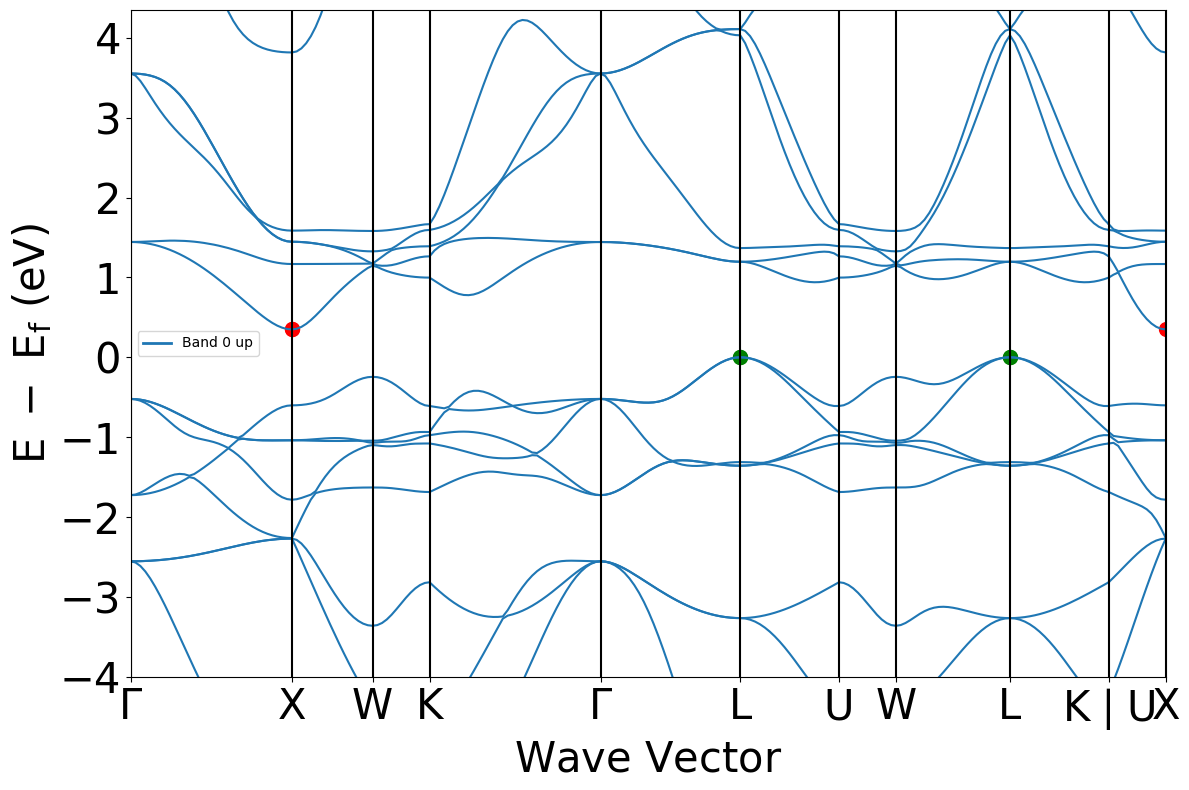

In [7]:
plot.get_plot(vbm_cbm_marker=True)

# Directions de dispertion
Le maximum de dispersion est la partie du graphe où la pente de la courbe des bandes électroniques est la plus raide. Le minimum de dispersion est inversement, la partie du graphe où la pente de la courbe des bandes électroniques est la moins raide.

In [8]:
#direction dans laquelle la dernière bande de valence et la première bande de conduction
#présentent le plus et le moins de dispersion.

#extraction des distances des points de la structure de bande
x = data.get('ticks').get('distance')
#tableau numpy contenant les positions des lignes verticales sur la structure de bande
x = np.array([x[0], x[1], x[3], x[5], x[7], x[9], x[11], x[13], x[15], x[17], x[18]])
#énergies des différentes bandes électroniques aux différents vecteurs d'onde k.
y = data.get('energy')

#distance en x 
delta_x = np.zeros(10)
for i in range(10):
    delta_x[i] = x[i+1] - x[i]

#distance en y entre les positions des bandes électroniques pour la premiére bande de conduction 
#et la dernière bande de valence
delta_yv = np.zeros(10)
delta_yc = np.zeros(10)
for i in range(10):
    delta_yv[i] =y.get('1')[i][14][-1] - y.get('1')[i][14][0] 
    delta_yc[i] =y.get('1')[i][15][-1] - y.get('1')[i][15][0]
#[-1] dernier élément de la bande de valence(énergie à la fin de la bande de valence)
#à la dernière valeur du vecteur d'onde k.
#[0] premier élément de la même bande de valence(énergie au début de la bande de valence)
    
#pente
pente_c = np.zeros(10)
pente_v = np.zeros(10)
for i in range (10):
    pente_c[i] = delta_yc[i]/delta_x[i]
    pente_v[i] = delta_yv[i]/delta_x[i] 
    
print(tabulate([["Pente de la dispertion max pour la dernière bande de conduction:",str(max(abs(pente_c)))],
                ["Pente de la dispertion min pour la dernière bande de conduction:",str(min(abs(pente_c)))],
                ["Pente de la dispertion max pour la première bande de valence:",str(max(abs(pente_v)))],
                ["Pente de la dispertion min pour la première bande de valence:",str(min(abs(pente_v)))]],
                headers=["En valeur absolue",""]))


En valeur absolue
----------------------------------------------------------------  ---------
Pente de la dispertion max pour la dernière bande de conduction:  1.69135
Pente de la dispertion min pour la dernière bande de conduction:  0.0641097
Pente de la dispertion max pour la première bande de valence:     0.951742
Pente de la dispertion min pour la première bande de valence:     0.0211093


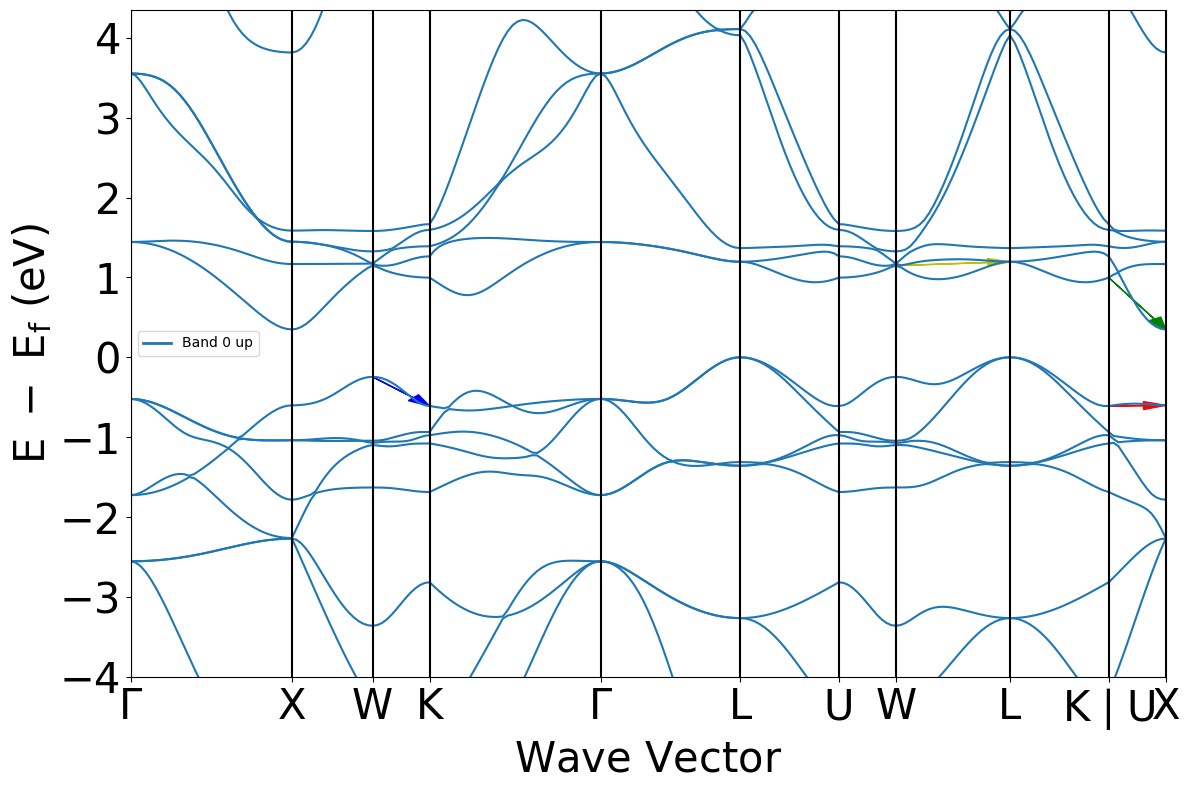

In [9]:
#graphe représentant les directions de dispertions par des flèches

plot.get_plot()
#max c
plt.arrow(x[9], (y.get('1')[9][15])[0], delta_x[9], delta_yc[9], color = 'g', head_width = 0.1,length_includes_head=True)
#min c
plt.arrow(x[7], (y.get('1')[7][15])[0], delta_x[7], delta_yc[7], color = 'y', head_width = 0.1,length_includes_head=True)
#max v
plt.arrow(x[2], (y.get('1')[2][14])[0], delta_x[2], delta_yv[2], color = 'b', head_width = 0.1,length_includes_head=True)
#min v
plt.arrow(x[9], (y.get('1')[9][14])[0], delta_x[9], delta_yv[9], color = 'r', head_width = 0.1,length_includes_head=True)

plt.show()

# Masse effective 
En supposant une dispersion parabolique, l'expression de la masse effective est donnée par:
$$m_{effective} = \frac{\hbar^2k^2}{2 E(k)} = \frac{\hbar^2(k_x^2+k_y^2+k_z^2)}{2 E(k)}$$

Avec E(k) l'énergie d'un électron de vecteur d'onde k.

In [10]:
hbar = 6.582e-16 #en eV

#masse effective au sommet de la dernière bande de valence
kp_vbm = vbm.get('kpoint').frac_coords
m_vbm = (hbar**2 * (kp_vbm[0]**2 + kp_vbm[1]**2 + kp_vbm[2]**2))/(2*abs(vbm.get('energy')))

#masse effective a la base de la première bande de conduction
kp_cbm = cbm.get('kpoint').frac_coords
m_cbm = (hbar**2 * (kp_cbm[0]**2 + kp_cbm[1]**2 + kp_cbm[2]**2))/(2*abs(cbm.get('energy')))

print(tabulate([["Au sommet de la bande de la dernière valence:",str(m_vbm)],
                ["A la base de la bande de la première conduction:",str(m_cbm)]],
                headers=["Masse effective en Kg",""]))

Masse effective en Kg
------------------------------------------------  -----------
Au sommet de la bande de la dernière valence:     2.17007e-32
A la base de la bande de la première conduction:  1.38233e-32
